## Testing for Normality 

>6 ways to test whether a variable has an underlying normal distribution:
1. Histogram
2. Box Plot
3. QQ Plot
4. Kolmogorov Smirnov Test
5. Lilliefors Test
6. Shapiro Wilk Test


### 01 Histogram

Gives us the frequency of occurrence per value in the dataset. Histogram is a graph used to represent the frequency distribution of a few data points of one variable

<AxesSubplot: >

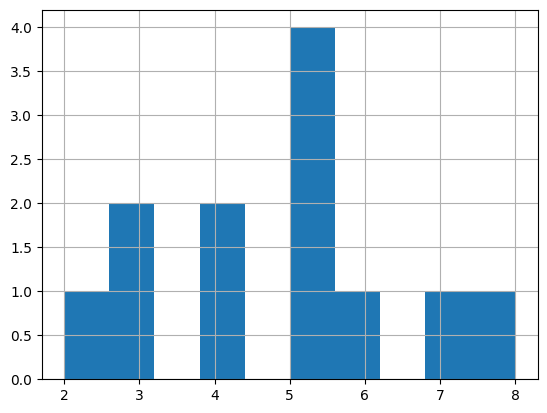

In [20]:
import pandas as pd
my_data = pd.Series([5, 6, 3, 4, 5, 7, 8, 5, 4, 3, 2, 5])
my_data.hist()

### 02 Box Plot

Plots the 5-number summary of a variable: minimum, first quartile, median, third quartile and maximum. The boxplot is a great way to visualize distributions of multiple variables at the same time, but a deviation in width/pointiness is hard to identify using box plots.

<AxesSubplot: >

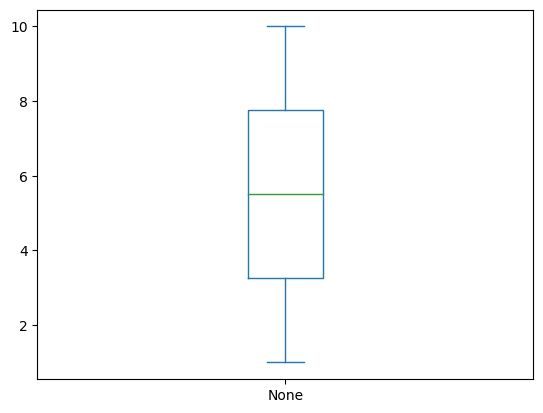

In [4]:
import pandas as pd
my_data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 8, 6, 4, 2])
my_data.plot(kind = 'box')

### 03 QQ Plot

Quantile vs Quantile Plot: plotting theoretical quantiles against the actual quantiles of our variable. If our variable follows a normal distribution, the quantiles of our variable must be perfectly in line with the “theoretical” normal quantiles: a straight line on the QQ Plot tells us we have a normal distribution.

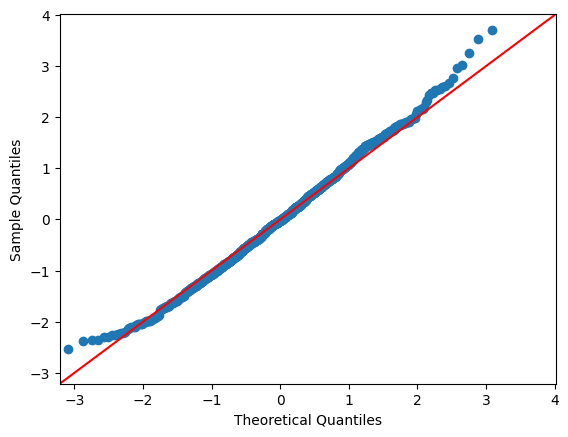

In [5]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

my_data = norm.rvs(size=1000)
sm.qqplot(my_data, line='45')
pylab.show()

### 04 Kolmogorov Smirnov Test

If the QQ Plot and other visualization techniques are not conclusive, statistical inference (Hypothesis Testing) can give a more objective answer to whether our variable deviates significantly from a normal distribution. 

The Kolmogorov Smirnov test computes the distances between the empirical distribution and the theoretical distribution and defines the test statistic as the supremum of the set of those distances.

The advantage of this is that the same approach can be used for comparing any distribution, not necessary the normal distribution only.

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true.

If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:
1. If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution
2. If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution

In [6]:
from scipy.stats import kstest, norm
my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

0.027104833946789475 0.4467514993299819


The KS test is well-known but it has not much power. This means that a large number of observations is necessary to reject the null hypothesis. It is also sensitive to outliers. On the other hand, it can be used for other types of distributions.

### 05 Lilliefors Test

The Lilliefors test is strongly based on the KS test. The difference is that in the Lilliefors test, it is accepted that the mean and variance of the population distribution are estimated rather than pre-specified by the user. Because of this, the Lilliefors test uses the Lilliefors distribution rather than the Kolmogorov distribution. Unfortunately for Lilliefors, it’s power is still lower than the Shapiro Wilk test.

1. If the P-Value of the Lilliefors Test is larger than 0.05, we assume a normal distribution
2. If the P-Value of the Lilliefors Test is smaller than 0.05, we do not assume a normal distribution

In [7]:
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors
my_data = norm.rvs(size=500)
lilliefors(my_data)

(0.02012082343908761, 0.9331429506545338)

Although Lilliefors is an improvement to the KS test it’s power is still lower than the Shapiro Wilk test.

### 06 Shapiro Wilk Test

The Shapiro Wilk test is the most powerful test when testing for a normal distribution. It has been developed specifically for the normal distribution and it cannot be used for testing against other distributions like for example the KS test. The Shapiro Wilk test is the most powerful test when testing for a normal distribution. 

1. If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution.
2. If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution.

The Shapiro Wilk test can be implemented as follows. It will return the test statistic called W and the P-Value.

Attention: for N > 5000 the W test statistic is accurate but the p-value may not be.

In [17]:
import numpy as np
from scipy import stats

rng = np.random.default_rng()
x = stats.norm.rvs(loc=5, scale=3, size=100, random_state=rng)

shapiro_test = stats.shapiro(x)
shapiro_test, shapiro_test.statistic, shapiro_test.pvalue

(ShapiroResult(statistic=0.9907185435295105, pvalue=0.722553551197052),
 0.9907185435295105,
 0.722553551197052)

### Conclusion

For quick and visual identification of a normal distribution, use a QQ plot if you have only one variable to look at and a Box Plot if you have many. Use a histogram if you need to present your results to a non-statistical public.

As a statistical test to confirm your hypothesis, use the Shapiro Wilk test. It is the most powerful test, which should be the decisive argument.

When testing against other distributions, you cannot use Shapiro Wilk and should use for example the Anderson-Darling test or the KS test.

<b><i>End.</i></b>